References

- https://diffeq.sciml.ai/stable/tutorials/ode_example/#Example-3:-Solving-Nonhomogeneous-Equations-using-Parameterized-Functions

In [1]:
using ReachabilityAnalysis, Plots

l = 1.0                             # length [m]
m = 1.0                             # mass[m]
g = 9.81                            # gravitational acceleration [m/s²]

# θ'(t) = ω(t)
# ω'(t) = -3g/(2l) sin θ(t) + 3/(ml^2)M(t)
function pendulum!(du,u,p,t)
    Mt = 0.1*sin(t)
    du[1] = u[2]                               
    du[2] = -3g/(2l)*sin(u[1]) + 3/(m*l^2)*Mt
end

θ₀ = 0.01                           # initial angular deflection [rad]
ω₀ = 0.0                            # initial angular velocity [rad/s]
u₀ = [θ₀, ω₀]                       # center of the initial set
U₀ = BallInf(zeros(2), 0.001) ⊕ u₀   # initial set
T = 10.0                            # time horizon

10.0

In [2]:
prob = @ivp(u' = pendulum!(u), dim=2, u(0) ∈ U₀);
sol = solve(prob, tspan=(0.0, 10.0), alg=TMJets());

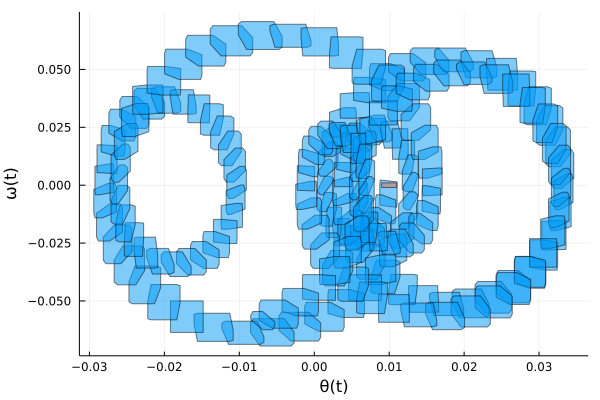

In [3]:
plot(sol, vars=(1, 2), xlab="θ(t)", ylab="ω(t)")
plot!(U₀)

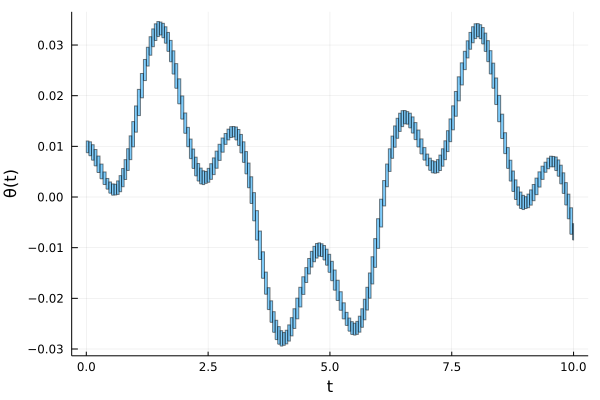

In [4]:
plot(sol, vars=(0, 1), xlab="t", ylab="θ(t)")

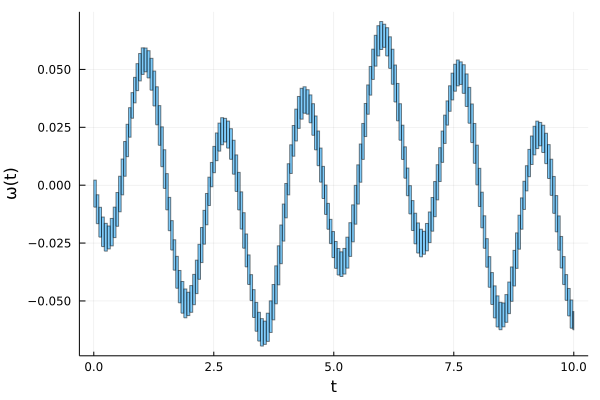

In [5]:
plot(sol, vars=(0, 2), xlab="t", ylab="ω(t)")

Now we plot some random trajectories using the ensemble simulation framework from DiffEq.

In [6]:
using DifferentialEquations
using ReachabilityAnalysis: solve # TODO use CommonSolve

In [7]:
sol = solve(prob, tspan=(0.0, 10.0), alg=TMJets(), trajectories=100, ensemble=true);

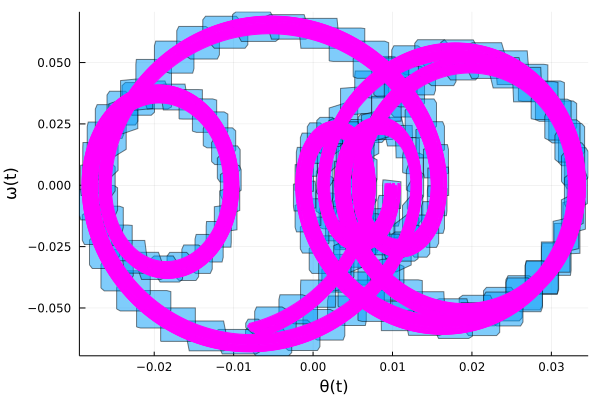

In [8]:
plot(sol, vars=(1, 2), xlab="θ(t)", ylab="ω(t)")
plot!(ensemble(sol), vars=(1, 2), c=:magenta)

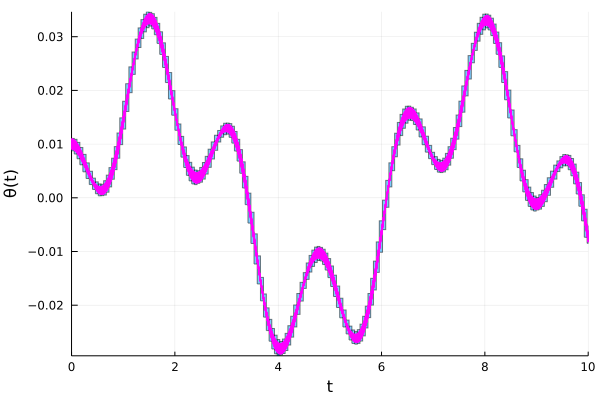

In [9]:
plot(sol, vars=(0, 1), xlab="t", ylab="θ(t)")
plot!(ensemble(sol), vars=(0, 1), c=:magenta)

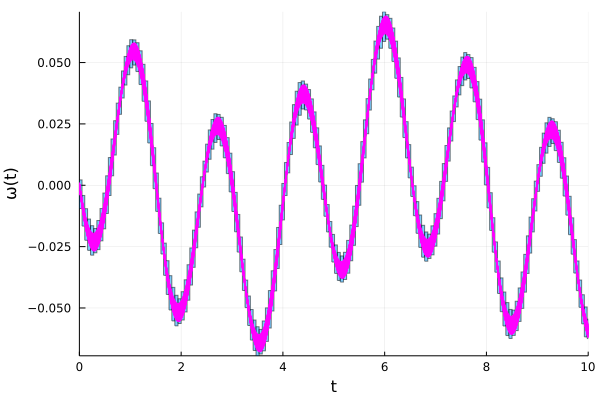

In [10]:
plot(sol, vars=(0, 2), xlab="t", ylab="ω(t)")
plot!(ensemble(sol), vars=(0, 2), c=:magenta)

## Comments

In the phase-space plots what is actually plotted is a (coarse) zonotopic overapproximation of the Taylor models. Such Taylor models represent nonconvex sets; the overapproximation with a convex set (zonotope) is just for quick plotting.

For instance, consider the first reach-set:

In [11]:
R1 = sol[1]

TaylorModelReachSet{Float64}(TaylorModels.TaylorModel1{TaylorN{Float64}, Float64}[  0.01 + 0.001 x₁ + ( 0.001 x₂) t + ( - 0.07357377375613124 - 0.007357132128065615 x₁ + 3.678688687806562e-8 x₁² + 1.2261886880109359e-9 x₁³ - 3.0655739065054684e-15 x₁⁴) t² + ( 0.05 - 0.0024523773760218716 x₂ + 2.4524591252043747e-8 x₁ x₂ + 1.2261886880109359e-9 x₁² x₂ - 4.0874318753406245e-15 x₁³ x₂) t³ + ( 0.09021532911404397 + 0.009020330008271758 x₁ - 1.8043065822808796e-7 x₁² + 6.131147813010937e-9 x₂² - 6.013553338847841e-9 x₁³ + 6.130943440054679e-10 x₁ x₂² + 6.014355274269598e-14 x₁⁴ - 3.0655739065054684e-15 x₁² x₂²) t⁴ + ( - 0.03928566064032808 + 3.6786886878065626e-7 x₁ + 0.001803705128308704 x₂ + 1.8392830320164038e-8 x₁² - 1.4434452658247035e-7 x₁ x₂ - 6.131147813010938e-14 x₁³ - 7.216264006617408e-9 x₁² x₂ + 1.226188688010936e-10 x₂³ - 1.5327358600136699e-15 x₁⁴ + 9.62296843883136e-14 x₁³ x₂ - 1.2262295626021876e-15 x₁ x₂³) t⁵ + ( - 0.04423513101098607 - 0.004419825659164987 x₁ + 2.452459125

This set contains all the trajectories in its time span,

In [12]:
tspan(R1)

[0, 0.0523562]

We get the set representation with `set`:

In [13]:
S1 = set(R1)

typeof(S1)

Vector{TaylorModels.TaylorModel1{TaylorN{Float64}, Float64}} (alias for Array{TaylorModels.TaylorModel1{TaylorN{Float64}, Float64}, 1})

It is a vector of two Taylor models (one for each variable, $\theta(t)$ and $\omega(t)$ respectively). The variable is "time", and the coefficients are (normalized) polynomials in the spatial variables.

In [14]:
S1[1]

  0.01 + 0.001 x₁ + ( 0.001 x₂) t + ( - 0.07357377375613124 - 0.007357132128065615 x₁ + 3.678688687806562e-8 x₁² + 1.2261886880109359e-9 x₁³ - 3.0655739065054684e-15 x₁⁴) t² + ( 0.05 - 0.0024523773760218716 x₂ + 2.4524591252043747e-8 x₁ x₂ + 1.2261886880109359e-9 x₁² x₂ - 4.0874318753406245e-15 x₁³ x₂) t³ + ( 0.09021532911404397 + 0.009020330008271758 x₁ - 1.8043065822808796e-7 x₁² + 6.131147813010937e-9 x₂² - 6.013553338847841e-9 x₁³ + 6.130943440054679e-10 x₁ x₂² + 6.014355274269598e-14 x₁⁴ - 3.0655739065054684e-15 x₁² x₂²) t⁴ + ( - 0.03928566064032808 + 3.6786886878065626e-7 x₁ + 0.001803705128308704 x₂ + 1.8392830320164038e-8 x₁² - 1.4434452658247035e-7 x₁ x₂ - 6.131147813010938e-14 x₁³ - 7.216264006617408e-9 x₁² x₂ + 1.226188688010936e-10 x₂³ - 1.5327358600136699e-15 x₁⁴ + 9.62296843883136e-14 x₁³ x₂ - 1.2262295626021876e-15 x₁ x₂³) t⁵ + ( - 0.04423513101098607 - 0.004419825659164987 x₁ + 2.452459125204375e-7 x₂ + 5.530807419780584e-7 x₁² + 2.4523773760218716e-8 x₁ x₂ - 3.30789540

We can simply overapproximate the set with a zonotope by pusing the nonlinear terms to new generators.

In [21]:
# @which overapproximate(S1, Zonotope) # FIXME should dispatch on ReachabilityAnalysis

Z1 = set(overapproximate(R1, Zonotope))

Zonotope{Float64, Vector{Float64}, SparseArrays.SparseMatrixCSC{Float64, Int64}}([0.009902748937664596, -0.0036464516416036086], 
  0.000989916  2.61781e-5   0.000140689   ⋅ 
 -0.000385191  0.000989916   ⋅           0.00445291)

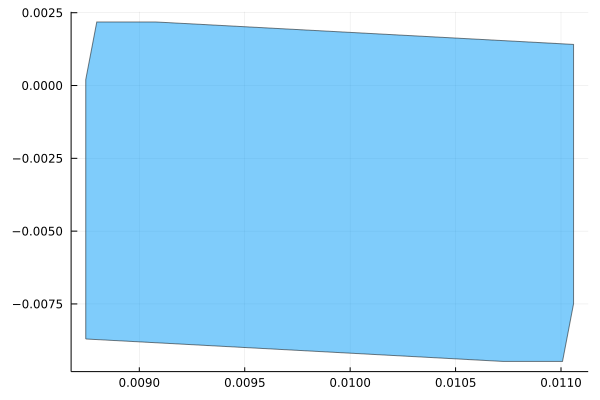

In [29]:
plot(Z1)

The evaluation uses interval arithmetic, and we can get better approximation by mincing either in space or in time (or both).

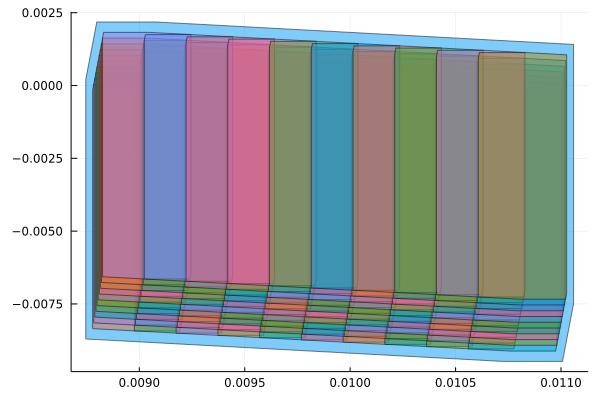

In [30]:
ZZ1 = overapproximate(R1, Zonotope, [10, 10]) |> set |> array |> UnionSetArray

plot!(ZZ1)

It would be convenient to implement an approach that actually draws the contours of the Taylor model reach-sets by using a library for implicit plotting.